In [12]:
!wget https://ribsandburgers.com/au/wp-content/uploads/2019/03/2-angus-bacon-and-cheese.jpg

--2021-11-10 07:42:25--  https://ribsandburgers.com/au/wp-content/uploads/2019/03/2-angus-bacon-and-cheese.jpg
Resolving ribsandburgers.com (ribsandburgers.com)... 103.242.49.242
Connecting to ribsandburgers.com (ribsandburgers.com)|103.242.49.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58178 (57K) [image/jpeg]
Saving to: ‘2-angus-bacon-and-cheese.jpg’

2-angus-bacon-and-c 100%[===================>]  56.81K   283KB/s    in 0.2s    

2021-11-10 07:42:26 (283 KB/s) - ‘2-angus-bacon-and-cheese.jpg’ saved [58178/58178]



In [13]:
# import the necessary packages
import matplotlib.pyplot as plt
import cv2

In [14]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [15]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/2-angus-bacon-and-cheese.jpg"
}

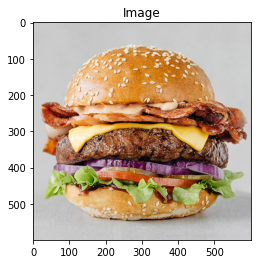

In [16]:
# load the image and display it
image = cv2.imread(args["image"])
plt_imshow("Image", image)

# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

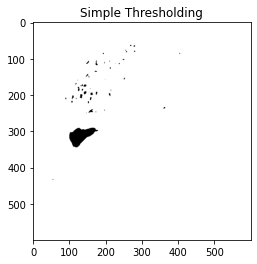

In [17]:
# apply simple thresholding with a hardcoded threshold value
(T, threshInv) = cv2.threshold(blurred, 230, 255,
	cv2.THRESH_BINARY_INV)
plt_imshow("Simple Thresholding", threshInv)

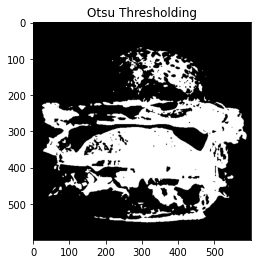

In [19]:
# apply Otsu's automatic thresholding
(T, threshInv) = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt_imshow("Otsu Thresholding", threshInv)

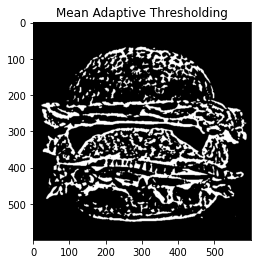

In [20]:
# instead of manually specifying the threshold value, we can use
# adaptive thresholding to examine neighborhoods of pixels and
# adaptively threshold each neighborhood
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
plt_imshow("Mean Adaptive Thresholding", thresh)

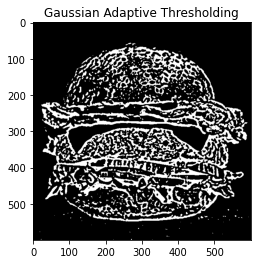

In [21]:
# perform adaptive thresholding again, this time using a Gaussian
# weighting versus a simple mean to compute our local threshold
# value
thresh = cv2.adaptiveThreshold(blurred, 255,
	cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
plt_imshow("Gaussian Adaptive Thresholding", thresh)